
# Mini-Project – Gradient Descent for Linear Regression

This notebook implements linear regression from scratch using gradient descent. We'll also compare our implementation with `scikit-learn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Generate toy dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term
X_b = np.c_[np.ones((100, 1)), X]

# Initialize weights
theta = np.random.randn(2, 1)
learning_rate = 0.1
n_epochs = 1000
m = len(X_b)

losses = []


In [2]:

for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta -= learning_rate * gradients

    loss = np.mean((X_b @ theta - y) ** 2)
    losses.append(loss)

print("Learned weights:", theta.ravel())


Learned weights: [4.22215108 2.96846751]


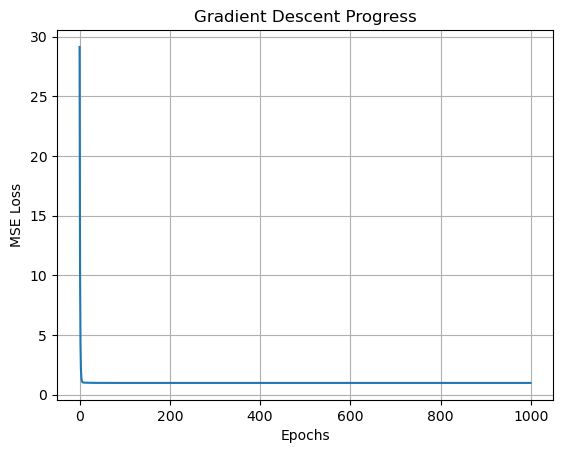

In [3]:

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Progress")
plt.grid(True)
plt.show()


In [4]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("scikit-learn coefficients:", lin_reg.intercept_, lin_reg.coef_)


scikit-learn coefficients: [4.22215108] [[2.96846751]]


Early stopping at epoch 7


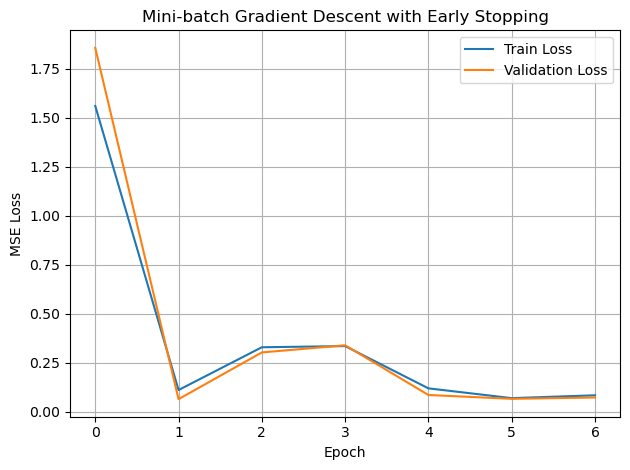

(array([ 1.13790607, -0.79169762,  0.29559564]),
 1.194853936122792,
 array([ 1.01742858, -0.62088548,  0.28952401]),
 1.1982262095726992)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic multi-variable linear regression data
np.random.seed(42)
n_samples = 200
X = np.random.rand(n_samples, 3)  # 3 input features
true_weights = np.array([3.5, -2.0, 1.0])
y = X @ true_weights + np.random.randn(n_samples) * 0.2

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameters
epochs = 200
learning_rate = 0.1
batch_size = 32
momentum = 0.9
tolerance = 1e-4
patience = 5

# Initialize weights and variables
weights = np.random.random(X_train.shape[1])
bias = 0
velocity = np.zeros_like(weights)
losses, val_losses = [], []
best_val_loss = float('inf')
no_improve_count = 0

# Mini-batch gradient descent with momentum and early stopping
for epoch in range(epochs):
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]
    
    for start in range(0, len(X_train), batch_size):
        end = start + batch_size
        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        # Predictions
        y_pred = X_batch @ weights + bias

        # Gradients
        error = y_pred - y_batch
        grad_w = 2 * X_batch.T @ error / len(X_batch)
        grad_b = 2 * np.mean(error)

        # Momentum update
        velocity = momentum * velocity - learning_rate * grad_w
        weights += velocity
        bias -= learning_rate * grad_b

    # Training and validation loss
    train_pred = X_train @ weights + bias
    val_pred = X_val @ weights + bias
    train_loss = np.mean((train_pred - y_train)**2)
    val_loss = np.mean((val_pred - y_val)**2)
    losses.append(train_loss)
    val_losses.append(val_loss)

    # Early stopping
    if val_loss + tolerance < best_val_loss:
        best_val_loss = val_loss
        no_improve_count = 0
    else:
        no_improve_count += 1
        if no_improve_count >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Compare with scikit-learn
linreg = LinearRegression()
linreg.fit(X_train, y_train)
sklearn_weights = linreg.coef_
sklearn_bias = linreg.intercept_

# Plot training vs validation loss
plt.plot(losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Mini-batch Gradient Descent with Early Stopping')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

weights, bias, sklearn_weights, sklearn_bias
